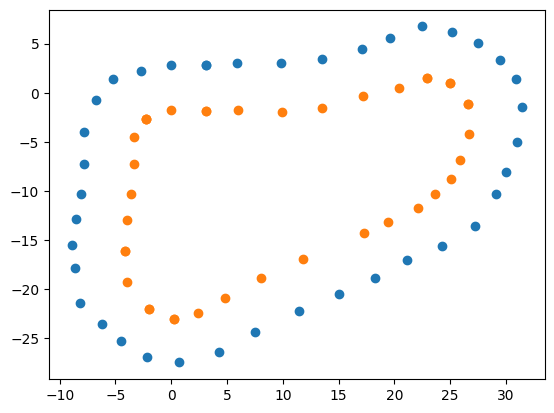

In [4]:
#Setup
import numpy as np
import matplotlib.pyplot as plt
right_cones = np.array([[  0.        ,  -1.8       ],
       [  3.08975935,  -1.85526252],
       [  3.08975935,  -1.85526252],
       [  5.98278999,  -1.79658258],
       [  9.93998051,  -1.9238925 ],
       [ 13.51483917,  -1.60300255],
       [ 17.14760971,  -0.37324256],
       [ 20.43093872,   0.49919745],
       [ 22.96524048,   1.5015974 ],
       [ 22.96524048,   1.5015974 ],
       [ 24.96493912,   0.98349744],
       [ 24.96493912,   0.98349744],
       [ 26.60513878,  -1.17945254],
       [ 26.60513878,  -1.17945254],
       [ 26.70603943,  -4.19208241],
       [ 25.87574005,  -6.82074261],
       [ 25.10573959,  -8.79710293],
       [ 23.67623901, -10.29980278],
       [ 22.07293892, -11.73102283],
       [ 19.41926956, -13.14719296],
       [ 17.26255989, -14.24060249],
       [ 11.7874794 , -16.96703339],
       [  8.0200491 , -18.86309242],
       [  4.81850958, -20.85530281],
       [  2.42930937, -22.41230202],
       [  0.23585963, -23.00790215],
       [  0.23585963, -23.00790215],
       [ -2.03406042, -21.97160339],
       [ -2.03406042, -21.97160339],
       [ -3.93006045, -19.28271294],
       [ -4.1577605 , -16.07309341],
       [ -4.1577605 , -16.07309341],
       [ -4.00456047, -12.92978287],
       [ -3.60896045, -10.29980278],
       [ -3.34806043,  -7.24268246],
       [ -3.34576043,  -4.51172256],
       [ -2.21866041,  -2.69177246],
       [ -2.21866041,  -2.69177246],
       [ -2.21866041,  -2.69177246]])
left_cones = np.array([[  0.        ,   2.8       ],
       [  3.11      ,   2.8       ],
       [  3.10911942,   2.7758975 ],
       [  5.93421936,   3.06389737],
       [  9.86850071,   3.01269746],
       [ 13.50389862,   3.4246974 ],
       [ 17.1364994 ,   4.42719746],
       [ 19.62929916,   5.53809738],
       [ 22.49173927,   6.74059725],
       [ 25.13863945,   6.20269728],
       [ 27.52183914,   5.08139753],
       [ 29.5031395 ,   3.33629751],
       [ 30.89194107,   1.40139747],
       [ 31.47583771,  -1.50406253],
       [ 30.99893951,  -5.02318239],
       [ 29.99224091,  -8.05927277],
       [ 29.09803772, -10.29980278],
       [ 27.18214035, -13.53974247],
       [ 24.28283882, -15.56417274],
       [ 21.11373901, -17.04388237],
       [ 18.25337029, -18.83869171],
       [ 15.06159019, -20.45490265],
       [ 11.42059994, -22.26320267],
       [  7.50223923, -24.33030319],
       [  4.25109959, -26.42150307],
       [  0.65132952, -27.45490265],
       [ -2.21166044, -26.94570351],
       [ -4.46276045, -25.22470284],
       [ -6.24296045, -23.57580185],
       [ -8.14336061, -21.38580322],
       [ -8.61766052, -17.86065292],
       [ -8.93846035, -15.45489216],
       [ -8.55606031, -12.85997295],
       [ -8.12086058, -10.29980278],
       [ -7.78436041,  -7.25734234],
       [ -7.84346056,  -4.02889252],
       [ -6.72216034,  -0.73046255],
       [ -5.18666053,   1.4138974 ],
       [ -2.75556044,   2.19019747]])
plt.scatter(left_cones[:, 0], left_cones[:, 1])
plt.scatter(right_cones[:, 0], right_cones[:, 1])

In [82]:
max_cones_detected = 10 # Controls max number of right/left cones detected
max_dropped_cones = 4 # Controls max number of cones to drop from detected set (for some variability)
max_rotational_error = (20) * (np.pi/180) # Controls max amount of rotational error added to detected cones (comverted to radians)
max_translational_error = 0.3 # Controls max_amount of translational noise (or uncertainty in position) of cones (in x and y directions combined)

def sample_detected_cones():
    """Randomly samples a start index for cone arrays, takes out max_cones_detected amount of cones starting from that index,
    and randomly drops up to max_dropped_cones cones from the selected ones. Returns the samples cones, as well as the corresponding
    indices from the original cone lists in which the select cones were take from"""
    idx_range = np.random.choice(np.arange(len(left_cones)))
    original_indices = np.arange(idx_range, min(len(left_cones), idx_range + max_cones_detected))
    left_choices = left_cones[idx_range:(idx_range + max_cones_detected)]
    right_choices = right_cones[idx_range:(idx_range + max_cones_detected)]
    if idx_range + max_cones_detected > len(left_cones):
        original_indices = np.append(original_indices, np.arange((idx_range + max_cones_detected) % len(left_cones)))
        left_choices = np.append(left_choices, left_cones[:((idx_range + max_cones_detected) % len(left_cones))], axis=0)
        right_choices = np.append(right_choices, right_cones[:((idx_range + max_cones_detected) % len(right_cones))], axis=0)
        
    kept_indices_left = np.sort(np.random.choice(np.arange(max_cones_detected), max_cones_detected - np.random.choice(np.arange(max_dropped_cones)), replace = False))
    kept_indices_right = np.sort(np.random.choice(np.arange(max_cones_detected), max_cones_detected - np.random.choice(np.arange(max_dropped_cones)), replace = False))
    
    return left_choices[kept_indices_left], right_choices[kept_indices_right], original_indices[kept_indices_left], original_indices[kept_indices_right]

def get_origin(left_cones, right_cones):
    return np.array([(left_cones[0][0] + right_cones[0][0]) / 2, (left_cones[0][1] + right_cones[0][1]) / 2])
    
def add_rotational_error(left_cones, right_cones):
    """Add some rotational variance to inputted cones"""
    origin = get_origin(left_cones, right_cones)
    adjusted_left = left_cones - origin
    adjusted_right = right_cones - origin
    angle = np.random.uniform(-max_rotational_error, max_rotational_error)
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    return (adjusted_left @ rotation_matrix + origin), (adjusted_right @ rotation_matrix + origin) 

def add_translational_error(left_cones, right_cones):
    """Add some translational variance to inputted cones"""
    for x in left_cones:
        cone_noise = np.random.uniform(-max_translational_error, max_translational_error)
        angle = np.random.uniform(0, 2*np.pi)
        x[0] += np.cos(angle) * cone_noise
        x[1] += np.sin(angle) * cone_noise
    for x in right_cones:
        cone_noise = np.random.uniform(-max_translational_error, max_translational_error)
        angle = np.random.uniform(0, 2*np.pi)
        x[0] += np.cos(angle) * cone_noise
        x[1] += np.sin(angle) * cone_noise
    return left_cones, right_cones

def detect_cones():
    """Simulate detecting cones, getting random set and adding all errors. Returns set of noisy cones, and the correct indicies of the cones in the
    original sets of cones"""
    left_sampled, right_sampled, left_idxs, right_idxs = sample_detected_cones()
    left_sampled, right_sampled = add_rotational_error(left_sampled, right_sampled)
    left_sampled, right_sampled = add_translational_error(left_sampled, right_sampled)
    return left_sampled, right_sampled, left_idxs, right_idxs
    

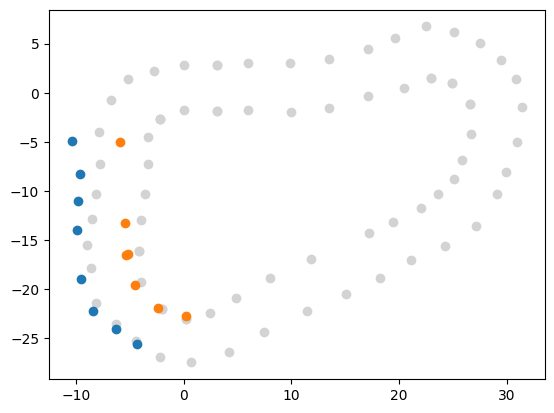

In [86]:
#Sample_cones test
left_sampled, right_sampled, left_idxs, right_idxs = detect_cones()
left_sampled, right_sampled = add_rotational_error(left_sampled, right_sampled)
plt.scatter(left_cones[:, 0], left_cones[:, 1], c='lightgray')
plt.scatter(right_cones[:, 0], right_cones[:, 1], c='lightgray')
plt.scatter(left_sampled[:, 0], left_sampled[:, 1])
plt.scatter(right_sampled[:, 0], right_sampled[:, 1])